# Import Libraries

In [7]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

## Load Data

In [8]:
# Patient Data
patients = pd.read_csv('mimic-iii-clinical-database-demo-1.4/PATIENTS.csv')

# Transfer Data
transfers = pd.read_csv('mimic-iii-clinical-database-demo-1.4/TRANSFERS.csv')

# Prescription Data
prescriptions = pd.read_csv('mimic-iii-clinical-database-demo-1.4/PRESCRIPTIONS.csv')

# Lab Events Data
lab_items = pd.read_csv('mimic-iii-clinical-database-demo-1.4/D_LABITEMS.csv')
lab_events = pd.read_csv('mimic-iii-clinical-database-demo-1.4/LABEVENTS.csv')

# Chart Events Data
chart_events = pd.read_csv('mimic-iii-clinical-database-demo-1.4/CHARTEVENTS.csv')
d_items = pd.read_csv('mimic-iii-clinical-database-demo-1.4/D_ITEMS.csv')

# Procedures Data
procedures = pd.read_csv('mimic-iii-clinical-database-demo-1.4/PROCEDURES_ICD.csv')
procedures_labels = pd.read_csv('mimic-iii-clinical-database-demo-1.4/D_ICD_PROCEDURES.csv')

C:\Users\patel\AppData\Local\Temp\ipykernel_21852\2605732906.py:15: DtypeWarning: Columns (8,10,13,14) have mixed types. Specify dtype option on import or set low_memory=False.
  chart_events = pd.read_csv('mimic-iii-clinical-database-demo-1.4/CHARTEVENTS.csv')


## Patients Table (From Tutorial)

In [9]:
from datetime import datetime
filtered_patients = patients
# Calculate age function
def calculate_age(dob, dod):
    dob_date = datetime.strptime(dob, "%Y-%m-%d %H:%M:%S")
    dod_date = datetime.strptime(dod, "%Y-%m-%d %H:%M:%S")
    age = (dod_date - dob_date).days // 365
    return age

# Apply calculate_age function to create "age" column
filtered_patients["age"] = filtered_patients.apply(lambda row: calculate_age(row["dob"], row["dod"]), axis=1)

# Filter out rows with age greater than or equal to 120
filtered_patients = filtered_patients[filtered_patients["age"] < 120]

# Display the updated DataFrame
print(filtered_patients.head())

   row_id  subject_id gender                  dob                  dod  \
0    9467       10006      F  2094-03-05 00:00:00  2165-08-12 00:00:00   
1    9472       10011      F  2090-06-05 00:00:00  2126-08-28 00:00:00   
2    9474       10013      F  2038-09-03 00:00:00  2125-10-07 00:00:00   
3    9478       10017      F  2075-09-21 00:00:00  2152-09-12 00:00:00   
4    9479       10019      M  2114-06-20 00:00:00  2163-05-15 00:00:00   

              dod_hosp              dod_ssn  expire_flag  age  
0  2165-08-12 00:00:00  2165-08-12 00:00:00            1   71  
1  2126-08-28 00:00:00                  NaN            1   36  
2  2125-10-07 00:00:00  2125-10-07 00:00:00            1   87  
3                  NaN  2152-09-12 00:00:00            1   77  
4  2163-05-15 00:00:00  2163-05-15 00:00:00            1   48  


## Analyze Transfer Data

In [10]:
merged_transfers_patients = pd.merge(transfers, filtered_patients, on='subject_id')
merged_transfers_patients.head()

,row_id_x,subject_id,hadm_id,icustay_id,dbsource,eventtype,prev_careunit,curr_careunit,prev_wardid,curr_wardid,...,outtime,los,row_id_y,gender,dob,dod,dod_hosp,dod_ssn,expire_flag,age
0,54440,10006,142345,206504.0,carevue,admit,NaN,MICU,NaN,52.0,...,2164-10-25 12:21:07,39.18,9467,F,2094-03-05 00:00:00,2165-08-12 00:00:00,2165-08-12 00:00:00,2165-08-12 00:00:00,1,71
1,54441,10006,142345,NaN,carevue,transfer,MICU,NaN,52.0,45.0,...,2164-11-01 17:14:27,172.89,9467,F,2094-03-05 00:00:00,2165-08-12 00:00:00,2165-08-12 00:00:00,2165-08-12 00:00:00,1,71
2,54442,10006,142345,NaN,carevue,discharge,NaN,NaN,45.0,NaN,...,NaN,NaN,9467,F,2094-03-05 00:00:00,2165-08-12 00:00:00,2165-08-12 00:00:00,2165-08-12 00:00:00,1,71
3,54460,10011,105331,232110.0,carevue,admit,NaN,MICU,NaN,15.0,...,2126-08-28 18:59:00,332.42,9472,F,2090-06-05 00:00:00,2126-08-28 00:00:00,2126-08-28 00:00:00,NaN,1,36
4,54461,10011,105331,NaN,carevue,discharge,MICU,NaN,15.0,NaN,...,NaN,NaN,9472,F,2090-06-05 00:00:00,2126-08-28 00:00:00,2126-08-28 00:00:00,NaN,1,36


### Analyze Event Types

([0, 1, 2],
 [Text(0, 0, 'admit'), Text(1, 0, 'transfer'), Text(2, 0, 'discharge')])

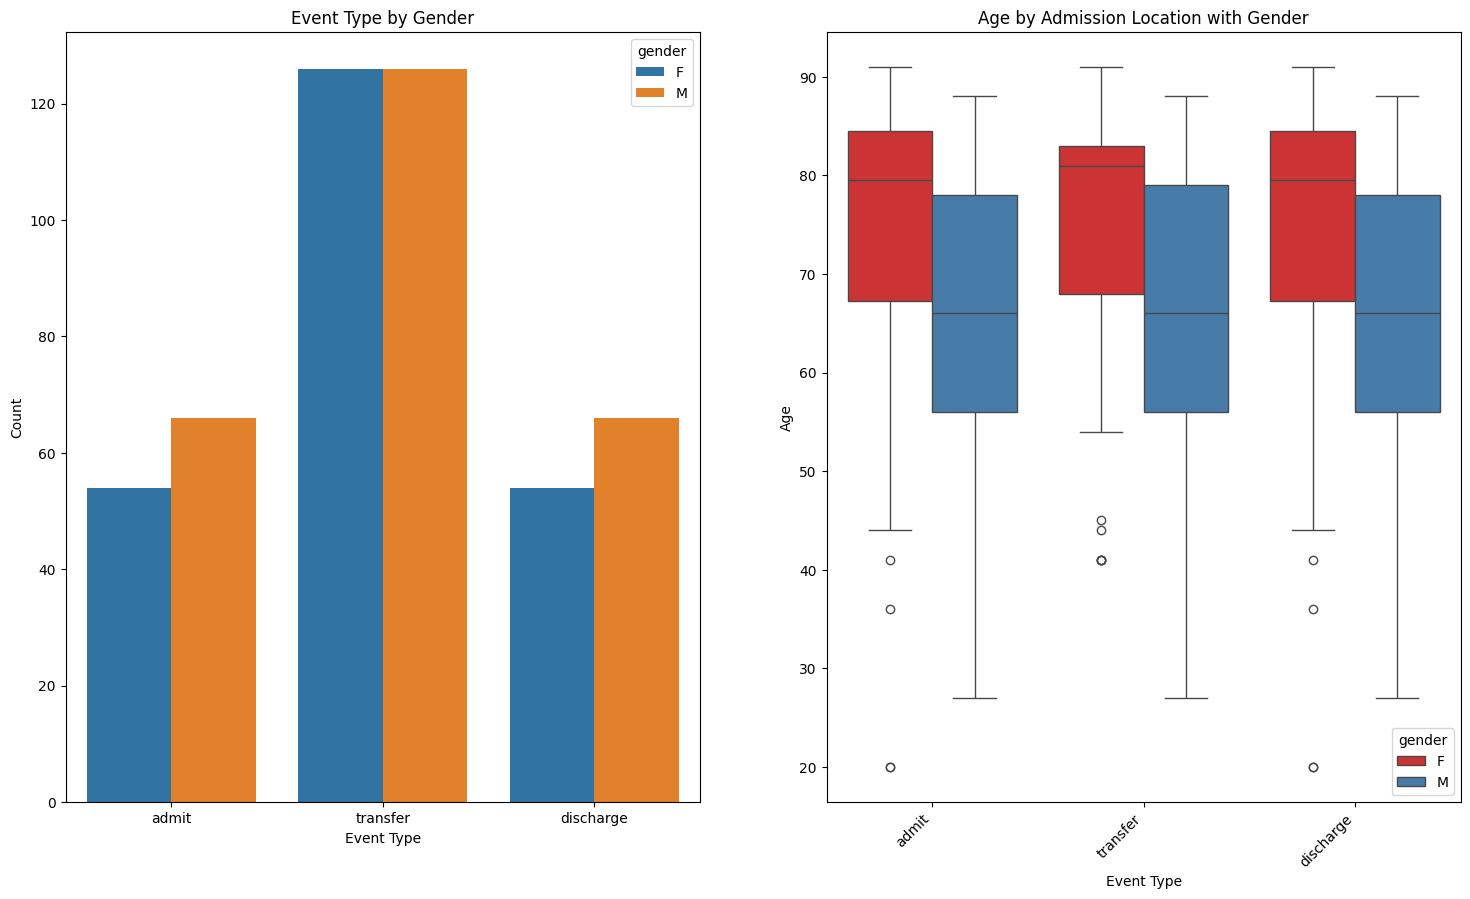

In [13]:
# Create a complex visualization
plt.figure(figsize=(18, 10))

# Count plot of Admission Types by Gender
plt.subplot(1, 2, 1)
sns.countplot(data=merged_transfers_patients, x='eventtype', hue='gender')
plt.title("Event Type by Gender")
plt.xlabel("Event Type")
plt.ylabel("Count")

# Box plot of Age by Event Type with Gender color hue
plt.subplot(1, 2, 2)
sns.boxplot(data=merged_transfers_patients, x='eventtype', y='age', hue='gender', palette='Set1')
plt.title("Age by Admission Location with Gender")
plt.xlabel("Event Type")
plt.ylabel("Age")
plt.xticks(rotation=45, ha='right')




## Analyze Prescription Data


In [14]:
merged_prescription_patients = pd.merge(prescriptions, filtered_patients, on="subject_id")
merged_prescription_patients.head()


,row_id_x,subject_id,hadm_id,icustay_id,startdate,enddate,drug_type,drug,drug_name_poe,drug_name_generic,...,form_unit_disp,route,row_id_y,gender,dob,dod,dod_hosp,dod_ssn,expire_flag,age
0,59637,42275,128293,290478.0,2135-10-25 00:00:00,2135-10-27 00:00:00,MAIN,Sodium Chloride 0.9% Flush,Sodium Chloride 0.9% Flush,Sodium Chloride 0.9% Flush,...,SYR,IV,31391,M,2058-08-04 00:00:00,2136-03-26 00:00:00,2136-03-26 00:00:00,NaN,1,77
1,59638,42275,128293,290478.0,2135-10-25 00:00:00,2135-10-27 00:00:00,MAIN,Heparin,Heparin,Heparin Sodium,...,mL,SC,31391,M,2058-08-04 00:00:00,2136-03-26 00:00:00,2136-03-26 00:00:00,NaN,1,77
2,59639,42275,128293,290478.0,2135-10-25 00:00:00,2135-10-27 00:00:00,MAIN,Guaifenesin,Guaifenesin,Guaifenesin,...,UDCUP,PO,31391,M,2058-08-04 00:00:00,2136-03-26 00:00:00,2136-03-26 00:00:00,NaN,1,77
3,59640,42275,128293,290478.0,2135-10-25 00:00:00,2135-10-27 00:00:00,MAIN,Albuterol Inhaler,Albuterol Inhaler,Albuterol Inhaler,...,INH,IH,31391,M,2058-08-04 00:00:00,2136-03-26 00:00:00,2136-03-26 00:00:00,NaN,1,77
4,59641,42275,128293,290478.0,2135-10-25 00:00:00,2135-10-27 00:00:00,MAIN,Amlodipine,Amlodipine,Amlodipine,...,TAB,PO,31391,M,2058-08-04 00:00:00,2136-03-26 00:00:00,2136-03-26 00:00:00,NaN,1,77


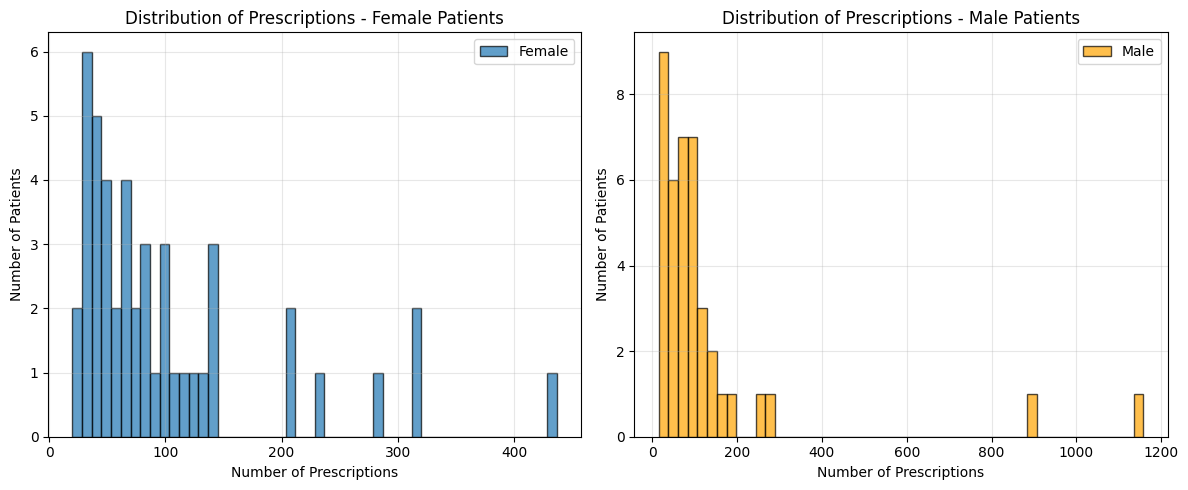

In [22]:
# Show the prescribed drugs count distribution by gender
plt.figure(figsize=(12, 5))

# Count prescriptions for female patients
female_counts = merged_prescription_patients[merged_prescription_patients['gender']=='F']['subject_id'].value_counts()

plt.subplot(1, 2, 1)
plt.hist(female_counts, bins=50, edgecolor='black', alpha=0.7, label='Female')
plt.title('Distribution of Prescriptions - Female Patients')
plt.xlabel('Number of Prescriptions')
plt.ylabel('Number of Patients')
plt.grid(True, alpha=0.3)
plt.legend()

# Count prescriptions for male patients
male_counts = merged_prescription_patients[merged_prescription_patients['gender']=='M']['subject_id'].value_counts()

plt.subplot(1, 2, 2)
plt.hist(male_counts, bins=50, edgecolor='black', alpha=0.7, color='orange', label='Male')
plt.title('Distribution of Prescriptions - Male Patients')
plt.xlabel('Number of Prescriptions')
plt.ylabel('Number of Patients')
plt.grid(True, alpha=0.3)
plt.legend()

plt.tight_layout()



C:\Users\patel\AppData\Local\Temp\ipykernel_21852\989502827.py:11: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.


C:\Users\patel\AppData\Local\Temp\ipykernel_21852\989502827.py:18: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.




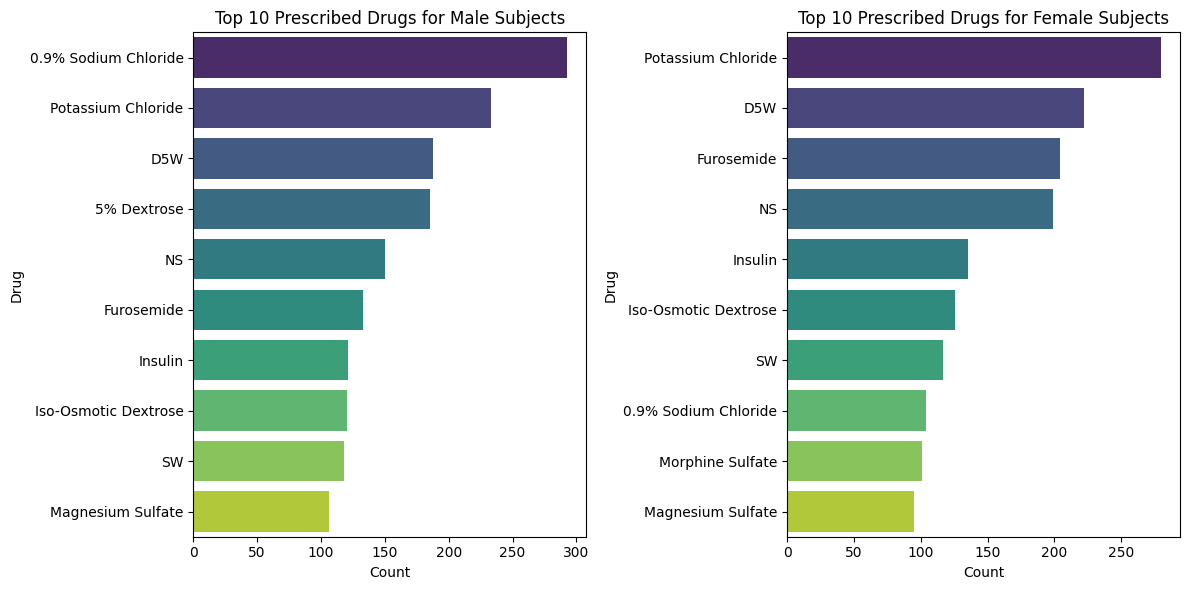

In [32]:
# Get count of drugs prescribed for each gender

prescription_counts_male = merged_prescription_patients[merged_prescription_patients['gender'] == 'M']['drug'].value_counts().head(10)
prescription_counts_female = merged_prescription_patients[merged_prescription_patients['gender'] == 'F']['drug'].value_counts().head(10)

# Create a figure with subplots
plt.figure(figsize=(12, 6))

# Subplot for Male Subjects
plt.subplot(1, 2, 1)
sns.barplot(x=prescription_counts_male.values, y=prescription_counts_male.index, palette='viridis')
plt.title("Top 10 Prescribed Drugs for Male Subjects")
plt.xlabel("Count")
plt.ylabel("Drug")

# Subplot for Female Subjects
plt.subplot(1, 2, 2)
sns.barplot(x=prescription_counts_female.values, y=prescription_counts_female.index, palette='viridis')
plt.title("Top 10 Prescribed Drugs for Female Subjects")
plt.xlabel("Count")
plt.ylabel("Drug")

# Adjust layout
plt.tight_layout()

# Show the plot
plt.show()



### Using Plotly to visualize such data

In [33]:
import pandas as pd
import plotly.graph_objects as go

# Create a DataFrame for male and female prescription counts
male_df = pd.DataFrame({'drug': prescription_counts_male.index, 'count': prescription_counts_male.values})
female_df = pd.DataFrame({'drug': prescription_counts_female.index, 'count': prescription_counts_female.values})

# Create a new column 'hover_text' that combines 'drug', 'count'
male_df['hover_text'] = male_df['drug'] + '<br>Count: ' + male_df['count'].astype(str)
female_df['hover_text'] = female_df['drug'] + '<br>Count: ' + female_df['count'].astype(str)

# Create treemaps using Plotly Graph Objects with custom hover data and template
fig_male = go.Figure(go.Treemap(
    labels=male_df['drug'],
    parents=[''] * len(male_df),  # Set parent to empty string to remove parent levels
    values=male_df['count'],
    customdata=male_df[['drug', 'hover_text']],
    hovertemplate='<b>%{customdata[0]}</b><br>%{customdata[1]}',
))
fig_male.update_layout(title='Top 10 Prescribed Drugs for Male Subjects')

fig_female = go.Figure(go.Treemap(
    labels=female_df['drug'],
    parents=[''] * len(female_df),  # Set parent to empty string to remove parent levels
    values=female_df['count'],
    customdata=female_df[['drug', 'hover_text']],
    hovertemplate='<b>%{customdata[0]}</b><br>%{customdata[1]}',
))
fig_female.update_layout(title='Top 10 Prescribed Drugs for Female Subjects')

# Show the treemaps
fig_male.show()
fig_female.show()


## Analyze Lab Data

## Analyze Chart Events Data

Maybe use patient data to add a Gender Column to the chart_events data, and then create a dictionary for each itemid -> Label for D_Items. And then plot the events data for each gender.

## Analyze Procedures Data

This is very similar to Diagnosis Data Analysis from Tutorial